![example](images/director_shot.jpeg)

# Project Title

**Author:** Trevor Mwangi
***

## Overview

This project uses exploratory data analysis(EDA) to generate insights for Microsoft. Microsoft have decided to create a new movie studio and want to find out what type of films to create. Data containing movie titles, their genres, grossing and number of votes has been used. Three datasets were used in this analysis to come up with recommendation on which combination of genres Microsoft should focus on in order to guarantee success. The analysis yielded that the combination Action, Adventure and SciFi was the most successful in terms of both domestic and foreign grossing and also according to the number of votes received. A combination of adventure with either animation or fantasy is also recommended as an alternative.
***

## Business Problem

Microsoft want to find out what type of films to create. Since they are new to the industry, they need to find out what type of films to create. This is a question of which genre to produce. The genres of the movies in the dataset will be analysed by grossing which is of the most important since that is how much a movie makes. Microsoft will definitely have an interest in this key variable. 

***

## Data Understanding
The data being used from this project was sourced from https://www.imdb.com/ which is a database for everything movies. The data contains movie titles, genres, both domestic and foreign grossing and is in the form of three files, one which contains the primary information about the movies such as titles, one which contains the rating information and the last file which contains information about the gross revenue. 

It is important to note that the domestic grossing relates to North America(USA, Canada and Puerto Rico). Foreign grossing is the grossing outside North America. The target variables of our data are the grossing columns which are numerical columns quoted in the US dollar.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




## Data Preparation

To prepare the data for analysis, I first combined the new_file and the ratings_file to form the big_df dataframe using the tconst column as it was a unique identifier for both dataframes. I then joined the gross_file with the big_df to now form the main_file dataframe using the title as the unique identifier which was the dataframe used for this analysis.I then created a new column, total_gross which was an addition of the domestic- and the foreign_gross columns. For my analysis, studio, original title and the start_year columns were not relevant and were subsequently dropped.
***

An important issue was dealing with missing values. The columns genres, domestic_gross and foreign_gross all contained missing values. For the genres column, being a categorical column, I replaced the null values with the most occurring value which was Drama. This was appropriate since for categorical values it is impossible to use summary statistics to fill null values and is therefore common to impute the null values with the most occurring value.
***

For the domestic_gross I replaced the missing values with the median value. It is common practice to replace missing values for numerical columns using measures of central tendency. I chose the median because the distribution of this column is skewed and when the distribution is skewed it is better to fill missing values using the median rather than the mean.
***

The foreign_gross was of the wrong data type. It was an object rather than a float. The first step was to convert the column to the correct data type which was done using a defined function and a lambda function. For this analysis, I chose to select movies that had a grossing of not less than $1,000,000. This was appropriate because movies that had a very low grossing would be of no interest to Microsoft. Dropping them had no effect on the distribution of the gross revenue. Most of the elements that were dropped from the foreign_gross column were missing anyway so this did not particularly affect the foreign_gross column.
***

In [3]:
import gzip #module to unzip the file
with gzip.open("zippedData/imdb.title.basics.csv.gz") as f:
    new_file = pd.read_csv(f)

In [4]:
new_file

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
with gzip.open('zippedData/imdb.title.ratings.csv.gz') as g: 
    ratings_file = pd.read_csv(g)

In [6]:
ratings_file

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [10]:
with gzip.open("zippedData/bom.movie_gross.csv.gz") as h:
    gross_file = pd.read_csv(h)

In [11]:
gross_file

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
new_file.set_index('tconst', inplace=True)#setting 'tconst' as the index

In [13]:
ratings_file.set_index('tconst', inplace=True)#setting 'tconst' as the index

In [14]:
big_df = pd.concat([new_file, ratings_file], join = 'inner', axis = 1)#combining the new_file and ratings_file dataframes
big_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [16]:
big_df.set_index('primary_title', inplace=True)#setting primary_title as the index for the combined df

In [17]:
gross_file.set_index('title', inplace=True)#setting the title as the index for the gross_file

In [18]:
main_file = big_df.join(gross_file, how = 'inner')#perform an inner join of the combined df and the gross_file to form main_file

In [19]:
main_file

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000,2016
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012
1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...
Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,58912,Eros,3100000.0,NaN,2011
Zombeavers,Zombeavers,2014,77.0,"Action,Adventure,Comedy",4.8,14825,Free,14900.0,NaN,2015
Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000,2011
Zoolander 2,Zoolander 2,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000,2016


In [196]:
main_file['total_gross'] = main_file['domestic_gross'] + main_file['foreign_gross']
main_file

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
0,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000.0,2016,110200000.0
1,102 Not Out,102.0,"Comedy,Drama",7.5,4802,1300000.0,10900000.0,2018,12200000.0
2,12 Strong,130.0,"Action,Drama,History",6.6,50155,45800000.0,21600000.0,2018,67400000.0
3,12 Years a Slave,134.0,"Biography,Drama,History",8.1,577301,56700000.0,131100000.0,2013,187800000.0
4,127 Hours,94.0,"Adventure,Biography,Drama",7.6,323949,18300000.0,42400000.0,2010,60700000.0
...,...,...,...,...,...,...,...,...,...
1416,Zero Dark Thirty,157.0,"Drama,Thriller",7.4,251072,95700000.0,37100000.0,2012,132800000.0
1417,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,2100000.0,2011,5200000.0
1418,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000.0,2011,169900000.0
1419,Zoolander 2,101.0,Comedy,4.7,59914,28800000.0,27900000.0,2016,56700000.0


In [21]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   3027 non-null   object 
 1   start_year       3027 non-null   int64  
 2   runtime_minutes  2980 non-null   float64
 3   genres           3020 non-null   object 
 4   averagerating    3027 non-null   float64
 5   numvotes         3027 non-null   int64  
 6   studio           3024 non-null   object 
 7   domestic_gross   3005 non-null   float64
 8   foreign_gross    1832 non-null   object 
 9   year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 260.1+ KB


In [22]:
main_file.isnull().sum() #checking for null values

original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [24]:
#dropping the studio and start_year columns
main_file = main_file.drop(['studio','start_year'], axis=1)

In [25]:
main_file.describe() #summary statistics for the main_file df

,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [26]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, '71 to Zootopia
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   3027 non-null   object 
 1   runtime_minutes  2980 non-null   float64
 2   genres           3020 non-null   object 
 3   averagerating    3027 non-null   float64
 4   numvotes         3027 non-null   int64  
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   object 
 7   year             3027 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 212.8+ KB


In [27]:
main_file.isna().sum() #checking for null values

original_title        0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [28]:
main_file[main_file['genres'].isna() == True] #checking null values in the genres column

,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
Going the Distance,Kazoku e,117.0,NaN,3.9,13,17800000.0,24200000,2010
I'm Still Here,I'm Still Here,60.0,NaN,7.1,14,409000.0,160000,2010
Joy,Hara,80.0,NaN,5.8,28,56500000.0,44700000,2015
Robin Hood,Robin Hood,NaN,NaN,7.6,5,105300000.0,216400000,2010
The Bounty Hunter,The Bounty Hunter,NaN,NaN,6.3,29,67099999.0,69300000,2010
The Intern,El pasante,65.0,NaN,5.5,22,75800000.0,118800000,2015
When the Bough Breaks,When the Bough Breaks,93.0,NaN,6.1,8,29700000.0,911000,2016


In [29]:
#checking the most frequent value in the main_file df
main_file['genres'].value_counts().index[0]

'Drama'

In [30]:
#replacing the null values in the runtime_minutes column with the median
main_file['runtime_minutes'] = main_file['runtime_minutes'].fillna(main_file['runtime_minutes'].median())

In [31]:
#replacing the missing values in the genres column with the most frequent value
main_file['genres'] = main_file['genres'].fillna(main_file['genres'].value_counts().index[0])

In [32]:
#checking that the null values in the genres column have been successfully replaced
main_file[main_file['original_title'] == 'Hara']

,original_title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
Joy,Hara,80.0,Drama,5.8,28,56500000.0,44700000,2015


In [33]:
main_file.isna().sum() #checking for null values

original_title        0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [37]:
main_file.reset_index(inplace=True) #resetting the index of the main_file

In [38]:
main_file.rename(columns = {'index': 'title'}, inplace=True) #renaming the titles column

In [39]:
main_file.drop('original_title', inplace = True, axis=1) #dropping the original_title column

In [43]:
subset2 = main_file.sort_values(by='numvotes')

In [44]:
#checking the value counts for the subset2 df
for col in subset2.columns:
    print(col)
    print(subset2[col].duplicated().value_counts())
    print()

title
False    2598
True      429
Name: title, dtype: int64

runtime_minutes
True     2893
False     134
Name: runtime_minutes, dtype: int64

genres
True     2705
False     322
Name: genres, dtype: int64

averagerating
True     2956
False      71
Name: averagerating, dtype: int64

numvotes
False    2742
True      285
Name: numvotes, dtype: int64

domestic_gross
False    1523
True     1504
Name: domestic_gross, dtype: int64

foreign_gross
True     2020
False    1007
Name: foreign_gross, dtype: int64

year
True     3018
False       9
Name: year, dtype: int64



In [49]:
main_file = main_file.sort_values(by='numvotes')#sort the df using the numvotes column

In [50]:
#dropping duplicates and keeping the last occurrence of the duplicated values
main_file = main_file.drop_duplicates(keep='last', subset='title')

In [51]:
main_file['title'].duplicated().value_counts() #checking for duplicates

False    2598
Name: title, dtype: int64

In [54]:
#sorting the df using the titles column and resetting the index then dropping
#the falsely numbered index
main_file = main_file.sort_values('title').reset_index().drop('index', axis=1)

In [55]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2598 non-null   object 
 1   runtime_minutes  2598 non-null   float64
 2   genres           2598 non-null   object 
 3   averagerating    2598 non-null   float64
 4   numvotes         2598 non-null   int64  
 5   domestic_gross   2581 non-null   float64
 6   foreign_gross    1557 non-null   object 
 7   year             2598 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 162.5+ KB


In [56]:
main_file.isna().sum() #checking for null values

title                 0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
domestic_gross       17
foreign_gross      1041
year                  0
dtype: int64

In [58]:
#filling the null values in the domestic_gross column with the median
main_file['domestic_gross'] = main_file['domestic_gross'].fillna(main_file['domestic_gross'].median())

In [71]:
#defining a function to remove the commas from the values in the foreign_gross column
def str_replace(val):
    if ',' in val:
        return float(val.replace(',', ''))*1000000
    else:
        return val

In [80]:
#replacing null values in the foreign_gross column with the string '?' as a placeholder value
main_file['foreign_gross'] = main_file.foreign_gross.replace(np.nan, '?').apply(str_replace)

In [81]:
#checking the objects with commas have been replaced with the return value in the str.replace function
main_file['foreign_gross'].iloc[1030]

1019400000.0

In [82]:
#replacing the string placeholder with a float placeholder and replacing the other objects in the
#column with a float using the lambda function
main_file['foreign_gross'] = main_file.foreign_gross.replace('?', 1.0).apply(lambda x: float(x))

In [83]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2598 non-null   object 
 1   runtime_minutes  2598 non-null   float64
 2   genres           2598 non-null   object 
 3   averagerating    2598 non-null   float64
 4   numvotes         2598 non-null   int64  
 5   domestic_gross   2598 non-null   float64
 6   foreign_gross    2598 non-null   float64
 7   year             2598 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 162.5+ KB


In [93]:
#displaying long numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [291]:
#reindexing the columns
main_file = main_file.reindex(columns=['title', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
                                       'domestic_gross', 'foreign_gross', 'total_gross', 'year'])

In [96]:
#dropping rows that have a domestic_gross of less than $1,000,000
to_drop = main_file[main_file['domestic_gross'] < 1000000] .sort_values(by='domestic_gross').index

In [292]:
main_file = main_file.drop(to_drop)

#dropping rows that have a foreign_gross of less than $1,000,000
main_file = main_file.drop(main_file[main_file['foreign_gross'] < 1000000].sort_values(by='foreign_gross').index)

#sorting by total_gross
main_file.sort_values(by='total_gross').head(30)

KeyError: '[1772 1633 1915 1954 1701 1550 1761 1521 1430 2105 2221 2511 1485 2091\n 2568 1708 1950 1844 2290 1697 2291 1645 1951 2025 2041 1434 2440 1865\n 2401 1959 2289 2226 1912 1457 1792 1458 1767 2459 1498 1511 2131 2362\n 2217 2239 1446 1874 1588 2564 1762 2196 2018 2171 1744 2530 2112 2128\n 2124 2506 1760 2377 2005 1779 1871 2213 1817 1720 1514 1857 2298 1741\n 2580 2010 2551 2259 2191 1743 1566 1969 2163 1581 2044 1980 1573 2594\n 1519 1807 1472 2351 2466 1778 2400 2132 2424 1824 2278 2575 1835 1545\n 2253 2527 1949 1565 2138 1834 2467 1864 2448 2017 1629 2350 1495 2425\n 2456 2427 2000 1438 2229 2381 1459 1587 2200 2177 1917 1947 2292 2097\n 2316 2414 1937 2452 2114 2581 2407 2158 1478 2276 1876 2277 1592 2054\n 1730 1754 2528 1489 2004 1733 2537 1805 2444 2503 2079 1580 2474 1988\n 1925 1723 2510 1596 2108 2210 2172 1426 2331 1492 2514 1602 2251 2495\n 1839 1669 1802 2422 1854 2307 1452 2194 2162 2113 1922 1759 1571 2312\n 1909 2455 1611 2472 2476 2379 2508 2561 1689 1429 2471 1690 2385 2115\n 2065 1970 1670 1482 1490 1941 2432 2209 1524 1537 2323 2483 2308 1796\n 2348 2119 1831 1800 2092 1618 1517 2082 2181 2494 2335 2241 1985 2489\n 2243 2465 2583 2063 1791 2302 2100 1541 1469 1637 1993 1721 2152 1520\n 1657 1600 1883 1609 2447 2265 1442 1666 1640 1423 1435 2330 2145 2146\n 2023 1977 2446 1766 2242 1878 1910 2139 2539 2174 2154 1809 1948 1747\n 1673 2101 1705 2346 2592 1775 2573 1617 1816 2372 2590 1797 1748 2419\n 2353 1901 2136 2416 1965 1966 1929 1433 2368 1821 2359 2176 1555 2203\n 1649 1582 2319 2310 1626 1422 2437 2094 1678 2064 2507 1790 1470 2584\n 2121 2111 1543 2378 1843 1990 1658 2040 2327 1832 2470 1850 1518 2430\n 2421 2197 2218 1789 2164 2490 1932 2187 2220 2019 1903 2410 2062 2549\n 1515 1806 2099 1551 2317 1539 2295 1710 1840 2089 1557 1837 2403 2293\n 2485 1825 2008 2404 1890 2036 2355 2512 1989 2475 2142 1558 2299 2087\n 2531 2357 2577 2205 2275 1939 2003 1902 2160 2249 1668 1793 1997 1826\n 1861 1987 1695 2219 2104 1512 2193 1679 2457 1487 2255 1500 1712 2383\n 1866 2334 1734 2380 1737 2428 1531 1653 2015 1736 1425 1622 2469 1732\n 1984 2048 1493 1782 1443 2536 1900 2283 2314 1444 2190 2173 1986 1665\n 1998 2521 1856 2498 1918 2463 2235 2032 1870 1818 2517 2417 2012 2473\n 1623 2159 2505 2477 2071 2374 2192 1869 2493 2287 1880 1781 1938 2301\n 1684 2201 1564 2055 1803 1820 2296 1513 1547 2347 2589 1914 1634 1663\n 1421 1453 1728 1608 1427 1833 1431 1474 1706 1731 2078 2161 1664 2234\n 2413 1560 1873 1879 1554 2570] not found in axis'

In [100]:
#resetting the index of the main_file df
main_file = main_file.reset_index().drop('index', axis=1)
main_file

,title,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
0,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000.0,38100000.0,2016
1,102 Not Out,102.0,"Comedy,Drama",7.5,4802,1300000.0,10900000.0,2018
2,12 Strong,130.0,"Action,Drama,History",6.6,50155,45800000.0,21600000.0,2018
3,12 Years a Slave,134.0,"Biography,Drama,History",8.1,577301,56700000.0,131100000.0,2013
4,127 Hours,94.0,"Adventure,Biography,Drama",7.6,323949,18300000.0,42400000.0,2010
...,...,...,...,...,...,...,...,...
1416,Zero Dark Thirty,157.0,"Drama,Thriller",7.4,251072,95700000.0,37100000.0,2012
1417,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama",8.1,58912,3100000.0,2100000.0,2011
1418,Zookeeper,102.0,"Comedy,Family,Romance",5.2,52396,80400000.0,89500000.0,2011
1419,Zoolander 2,101.0,Comedy,4.7,59914,28800000.0,27900000.0,2016


In [101]:
main_file.describe() #summary statistics

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1421.0,1421.0,1421.0,1421.0,1421.0,1421.0
mean,110.7,6.6,121645.0,55627867.7,88200211.1,2014.0
std,18.9,0.9,162639.2,83617477.9,156965969.4,2.5
min,40.0,1.6,10.0,1000000.0,1000000.0,2010.0
25%,97.0,6.0,24671.0,4600000.0,3300000.0,2012.0
50%,107.0,6.6,66595.0,26000000.0,23400000.0,2014.0
75%,121.0,7.2,145281.0,67300000.0,92000000.0,2016.0
max,189.0,8.8,1841066.0,700100000.0,1369500000.0,2018.0


In [197]:
main_file.corr() #getting the correlation of the main_file df

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
runtime_minutes,1.0,0.3,0.3,0.2,0.2,0.1,0.2
averagerating,0.3,1.0,0.4,0.2,0.2,0.0,0.2
numvotes,0.3,0.4,1.0,0.7,0.6,-0.2,0.6
domestic_gross,0.2,0.2,0.7,1.0,0.8,0.0,0.9
foreign_gross,0.2,0.2,0.6,0.8,1.0,0.1,1.0
year,0.1,0.0,-0.2,0.0,0.1,1.0,0.0
total_gross,0.2,0.2,0.6,0.9,1.0,0.0,1.0


***
## Data Modeling
I first used a heatmap to visualize the correlation between the different numerical columns in order to identify which columns had a strong relationship with the gross columns. This was important so as not to waste time on analysing columns which clearly have no relationship with our columns of interest. 

I mainly used bar graphs to analyse the relationship between the genres and the total gross column as well as the numvotes column. I also used a boxplot to quickly see which columns contain outliers. The bar graphs were made possible by;
- grouping the main_file using the genres column
- summing the total gross and numvotes columns
- sorting the resulting dataframe in a descending order;
- and then narrowing down to the top 20 results.

Grouping by the genres was the most suitable method of analysing the data since we are interested in finding out which combination of genres yield the highest grossing. Having 264 different genres, it was appropriate to narrow down to only the top 20 genres since the rest would be clatter and in the end would not be important in the decision making process.
***

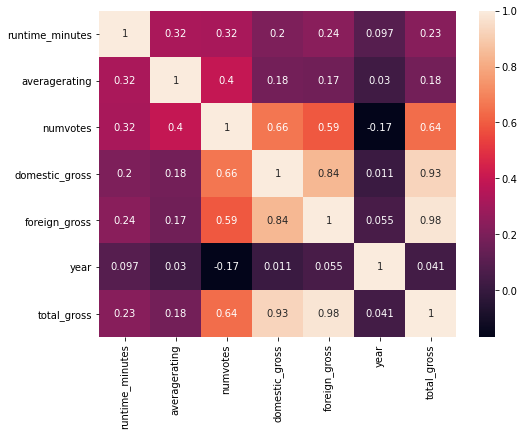

In [198]:
plt.figure(figsize=(8,6)) #setting the size of the plot
sns.heatmap(data=main_file.corr(), annot=True); 

***
## Correlation Heatmap
The above correlation heatmap visualizes the relationship between the different columns which are annotated by numbers between 0 and 1. This will enable us to know which numerical columns to focus on in our analysis. The columns that are of interest to us are domestic and foreign grossing. Therefore we will consider the relationship of the other columns with these two columns.

The numvotes column seems the only one to have a sort of strong relationship with our two columns of interest. Strong being over 0.5. We will therefore use the numvotes column in our analysis.
***

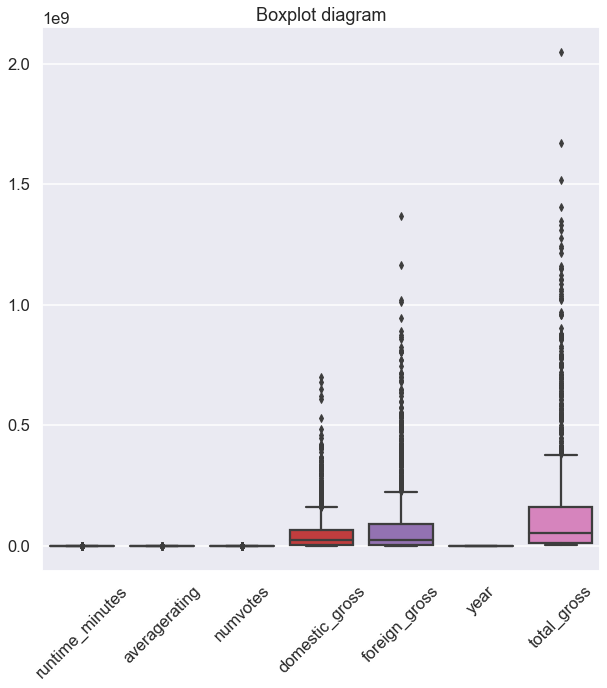

In [246]:
plt.figure(figsize=(10,10)) #setting plot size
ax = sns.boxplot(data=main_file)
ax.set(title='Boxplot diagram') #setting the title
plt.xticks(rotation=45); #setting the direction of the x-axis labels

***
The above diagram is a boxplot of the columns in our DataFrame. A quick glance at the plot clearly indicates that the domestic and foreign gross columns have a number of outliers. This is definitely to be expected in the movie industry as many movies will gross completely differently depending on its audience reception, history, cast,budget and other factors. 

For example, movies such as Avengers usually have a very large grossing and are the biggest outlier in our dataset at the very top. You have all sorts of gross figures from 1 million to $1.4 billion which is typical for the film industry. It is therefore difficult to rely on the mean as a measure of central tendency in our analysis. For this reason, we will retain the outliers for this analysis since they are extremely relevant in the decision making process.
***

## Frequency distribution of domestic grossing
The plot below is a histogram showing the frequency distribution of the domestic grossing column. Most films grossed around 1 million to 100 million domestically with a few outliers such as Avengers Infinity War which grossed close to 700 million domestically. The distribution is skewed to the right which is expected in the movie industry.
***

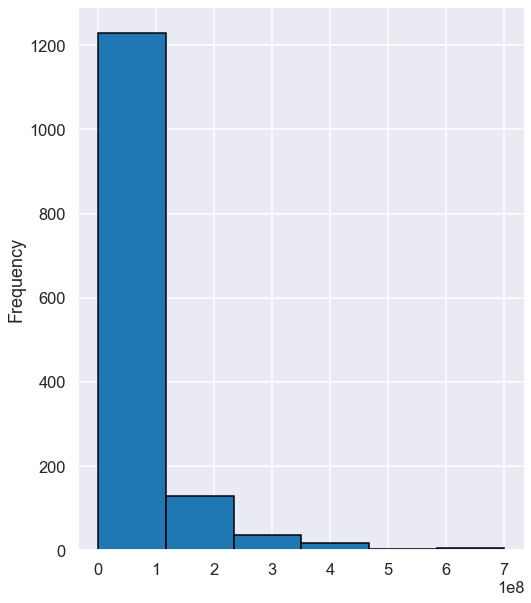

In [255]:
#plotting the freuency distribution of the domestic_gross column
main_file['domestic_gross'].plot(figsize=(8,10), kind='hist', bins=6, edgecolor='black');

***
## Frequency distribution of foreign grossing
The plot below is a histogram showing the frequency distribution of the foreign grossing column. Most of the films grossed around 1 million to 200 million. The distribution is skewed to the right just like in the domestic gross plotting. It is clear that the two plots are similar. This is because foreign grossing is a function of domestic grossing. There exists outliers such as the Avengers Infinity War which grossed close to $1.4 billion.
***

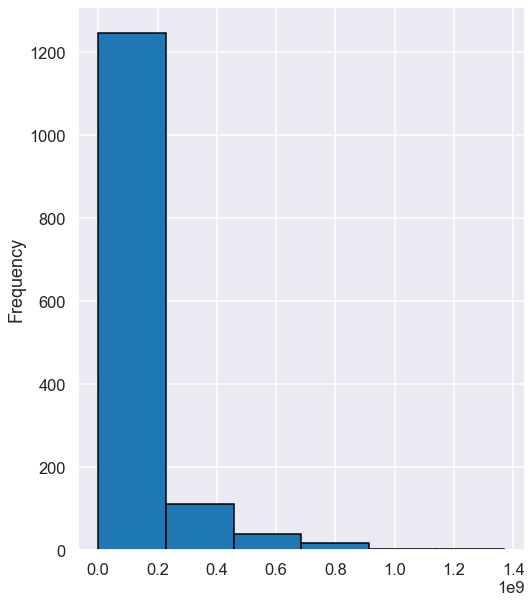

In [254]:
#plotting the freuency distribution of the foreign_gross column
main_file['foreign_gross'].plot(figsize=(8,10), kind='hist', bins=6, edgecolor='black');

***
## Frequency distribution of foreign grossing
The plot below is a histogram showing the frequency distribution of the total grossing column. The distribution is skewed to the right just like in the other 2 plots. It is clear that the two plots are similar. This is because foreign grossing is a function of both of the two previous plots.
***

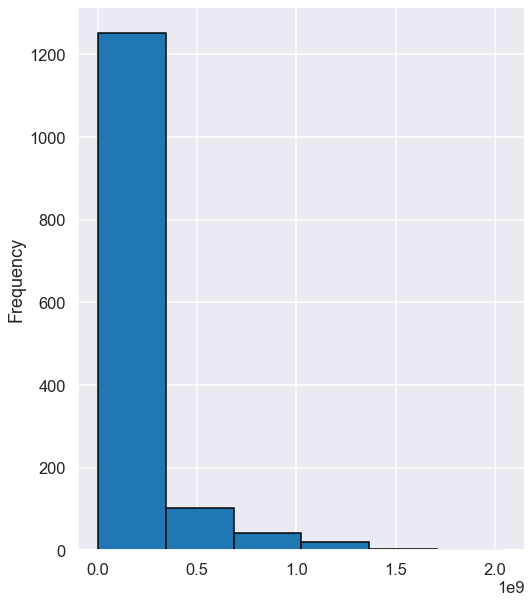

In [253]:
#plotting the freuency distribution of the total_gross column
main_file['total_gross'].plot(figsize=(8,10), kind='hist', bins=6, edgecolor='black');

In [213]:
#grouping the main_file df using the genres column and sorting in descending order
top_genres = main_file.groupby(main_file.genres)['genres'].count()\
.sort_values(ascending=False).head(20) 

#grouping the main_file df using the genres column and selecting the total_gross column
#and sorting in descending order
top_total_grossing = main_file.groupby(main_file.genres)['total_gross']\
.sum().sort_values(ascending=False).head(20)

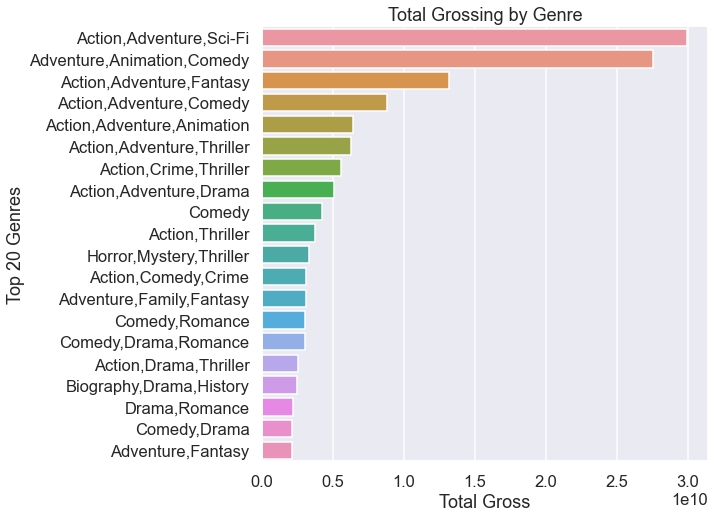

In [250]:
plt.figure(figsize=(8,8)) #setting the plot size
ax = sns.barplot(x= top_total_grossing, y=top_total_grossing.index) #plotting the graph

#setting the labels and title
ax.set(xlabel = 'Total Gross') 
ax.set(ylabel = 'Top 20 Genres')
ax.set(title = 'Total Grossing by Genre');

***
## Total Grossing by Genre
The plot above illustrates the total grossing of the top 20 genres. It is clear that action, adventure and sci-fi films have the highest domestic grossing which is largely due to the Avengers: Infinity war film. One other thing to note is that almost all of the top 10 genres have adventure and action within them which goes to show that a combination of a genre with adventure and action often yields success.
***

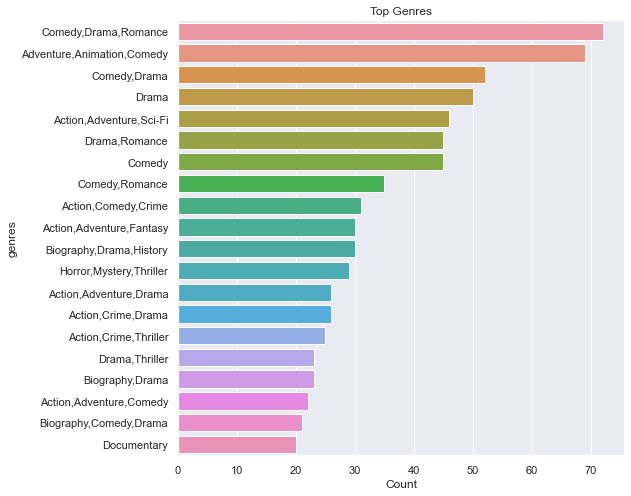

In [235]:
plt.figure(figsize=(8,8)) #setting the plot size
ax = sns.barplot(y=top_genres.index, x=top_genres) #plotting the graph

#setting the labels and title
ax.set(title='Top Genres')
ax.set(xlabel='Count')

#setting the style
sns.set_style('darkgrid')
sns.set_context('talk');

***
The above plot shows the top 20 genres in the dataset. The most occuring genre is comedy,drama and romance. This is the top genre though in terms of grossing it does not even make the top 10. This goes to show that the most popular genre will not necessarily be the top grossing genre since the top grossing genre is only at position 5 in terms of popularity.
***

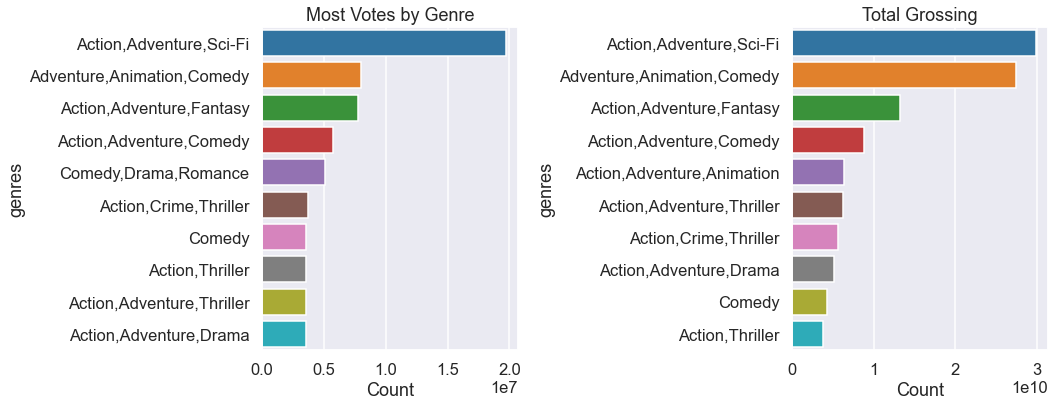

In [278]:
#grouping the main_file df by the genres column and selecting the numvotes column
#and sorting in descending order
most_votes = main_file.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(figsize=(15,6), ncols=2) #setting the plot size

sns.barplot(y=most_votes.index, x=most_votes, ax=axes[0]) #plotting the graph

#setting the label and title
axes[0].set(title='Most Votes by Genre')
axes[0].set(xlabel='Count');

#grouping the main_file df by the genres column and selecting the total_gross column
#and sorting in descending order
a = main_file.groupby(main_file.genres)['total_gross'].sum().sort_values(ascending=False).head(10)

sns.barplot(y=a.index, x=a, ax = axes[1]) #plotting the graph

#setting the title and xlabel
axes[1].set(title='Total Grossing')
axes[1].set(xlabel='Count');

plt.tight_layout() #code to avoid overlap of the axes

***
The two plots above show the most votes and the total grossing for the top 10 genres. It can be seen that the top 4 grossing genres are also the ones with the most votes which goes to say that these were obviously the most watched films. Comedy, Drama and Romance, which is the genre with the highest occurrence in our dataset, is at position 5 which might be one of the reasons why it isn't the top grossing genre. The number of votes is a direct indicator of how many people have interacted with the film and it is therefore safe to assume that the higher the number of votes, the higher the grossing which is evidenced by the scatter plot below.
***

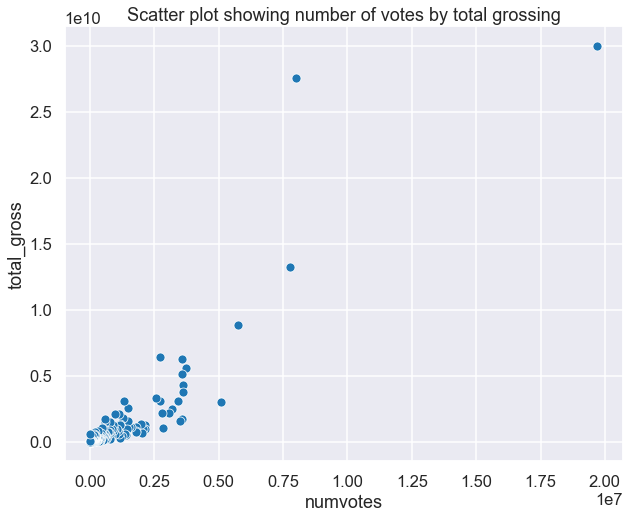

In [277]:
#grouping the main_file df by the genres column and selecting the total_gross and numvotes columns
#and sorting in descending order by the number of votes
df2 = main_file.groupby('genres')[['numvotes', 'total_gross']]\
.sum().sort_values(by='numvotes', ascending=False)

plt.figure(figsize=(10,8)) #setting the plot size

ax = sns.scatterplot(x=df2.numvotes, y=df2.total_gross) #plotting the graph

#setting the title
ax.set(title='Scatter plot showing number of votes by total grossing');

***
## Evaluation
The Most votes by genre and the total grossing graphs both show that the combination of Adventure, Action and SciFi are the most successful genres. It is also clear that the adventure genre cuts across almost all of the genre combinations. This especially yields a lot of success when paired up with an element of action or animation or fantasy.

To improve confidence in these set of results, next time I would;
- include the budget of the movies in order to arrive at a net figure since working with gross figures does not take into account the budgetary element of these movies which sometimes end up being quite large
- broken the data into the relevant years to examine whether there is a change in the top genres year by year or whether adventure, action, scifi would remain the top genre across several years. This will make it possible to determine whether audience tastes change over time which is important when considering such an expensive long term level of investment.

***

## Conclusions

This project yields three recommendations with regards to successful movie types;
make movies with the genre combination Action, Adventure, SciFi the number 1 priority. Movies with Adventure, Animation and Comedy can be produced as an alternative. Action, Adventure and Fantasy is included as the third recommendation just to diversify the portfolio but to ensure maximum succesS, the first film combination should be the main focus of the company. Adventure is a key component of the successful films and should therefore be a key feature in any of the films to be produced by Microsoft.

Some of the reasons why this analysis might not fully solve the business problem are due to the inherent limitations of the analysis. These include;
- who does the classification of the genres? Could they be biased?
- could a single film be classified differently by different audiences?
- is it necessary to include critic scores in the evaluation of the success of a film?
- is the classification of genres too broad and could a narrower approach yield different results?

Future analysis would include the budget spent of the films to see the success of the films based on a more financially sound measure such as net profit rather than the gross amount which might be misleading.
***